In [1]:
from google.colab import files
uploaded = files.upload()


Saving butterfly-classification.zip to butterfly-classification.zip


In [2]:
import zipfile
import os

# Lấy tên file zip từ đối tượng uploaded
filename = list(uploaded.keys())[0]
zip_path = f"/content/{filename}"

# Thư mục đích
extract_path = "butterfly-data"
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Giải nén thành công vào thư mục:", extract_path)

✅ Giải nén thành công vào thư mục: butterfly-data


In [3]:
!pip install tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 10.8 MB/s eta 0:00:00


In [4]:
# (Nếu chưa cài TensorFlow)
# !pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10


In [5]:
import tensorflow as tf

# Định nghĩa các hằng số
BATCH_SIZE = 32
IMAGE_SIZE = 224

# Tạo tập dữ liệu huấn luyện
training_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/train",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

# Tạo tập dữ liệu kiểm tra
validation_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/test",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

# Tạo tập dữ liệu kiểm tra
validation_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/val",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True)


Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.


In [6]:
# checking if the data
classes = training_data.class_names
print(
    "Num classes: ", len(classes),
    "\nClass Names: ", classes
)

Num classes:  75 
Class Names:  ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPE

In [7]:
from tensorflow.image import rgb_to_grayscale
import cv2
mean_array = []
#laplacian_array = []
for images, labels in training_data.as_numpy_iterator():
    for image in images:
        mean_array.append(np.asarray(rgb_to_grayscale(image)).reshape(-1, 1).mean())
        #laplacian_array.append(np.asarray(np.random.laplace(image)).reshape(-1, 1).var())

In [8]:
len(mean_array)

9285

In [9]:
#len(laplacian_array)

In [10]:
mean_array[:5]

[np.float32(114.72864),
 np.float32(118.435455),
 np.float32(87.2307),
 np.float32(105.11872),
 np.float32(181.31749)]

In [11]:
#laplacian_array[:5]

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.image import rgb_to_grayscale
import cv2

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

# Định nghĩa các hằng số
BATCH_SIZE = 32
IMAGE_SIZE = 224

# Tạo tập dữ liệu huấn luyện
training_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/train",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

# Tạo tập dữ liệu kiểm tra
validation_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/test",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

# Tạo tập dữ liệu kiểm tra
validation_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/val",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True)

# checking if the data
classes = training_data.class_names
print(
    "Num classes: ", len(classes),
    "\nClass Names: ", classes
)

mean_array = []
#laplacian_array = []
for images, labels in training_data.as_numpy_iterator():
    for image in images:
        mean_array.append(np.asarray(rgb_to_grayscale(image)).reshape(-1, 1).mean())
        #laplacian_array.append(np.asarray(np.random.laplace(image)).reshape(-1, 1).var())

# Calculate the statistics for mean_array
mean = np.mean(mean_array)
median = np.median(mean_array)
std_dev = np.std(mean_array)
min = np.min(mean_array)
max = np.max(mean_array)

print(
    "\nImage Grayscale Values:",
    "\n----------",
    "\n\tMean: ", mean,
    "\n\tMedian: ", median,
    "\n\tStandard Deviation: ", std_dev,
    "\n\tMinimum: ", min,
    "\n\tMaximum: ", max
)
# print(
#     "\nImage Laplacian Values:",
#     "\n----------",
#     "\n\tMean: ", lap_mean,
#     "\n\tMedian: ", lap_median,
#     "\n\tStandard Deviation: ", lap_std_dev,
#     "\n\tMinimum: ", lap_min,
#     "\n\tMaximum: ", lap_max
# )

Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Num classes:  75 
Class Names:  ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW',

In [14]:
print(
    "\nImage Grayscale Values:",
    "\n----------",
    "\n\tMean: ", mean,
    "\n\tMedian: ", median,
    "\n\tStandard Deviation: ", std_dev,
    "\n\tMinimum: ", min,
    "\n\tMaximum: ", max
)
# print(
#     "\nImage Laplacian Values:",
#     "\n----------",
#     "\n\tMean: ", lap_mean,
#     "\n\tMedian: ", lap_median,
#     "\n\tStandard Deviation: ", lap_std_dev,
#     "\n\tMinimum: ", lap_min,
#     "\n\tMaximum: ", lap_max
# )


Image Grayscale Values: 
---------- 
	Mean:  115.560715 
	Median:  113.50199 
	Standard Deviation:  28.319862 
	Minimum:  25.816753 
	Maximum:  242.44257


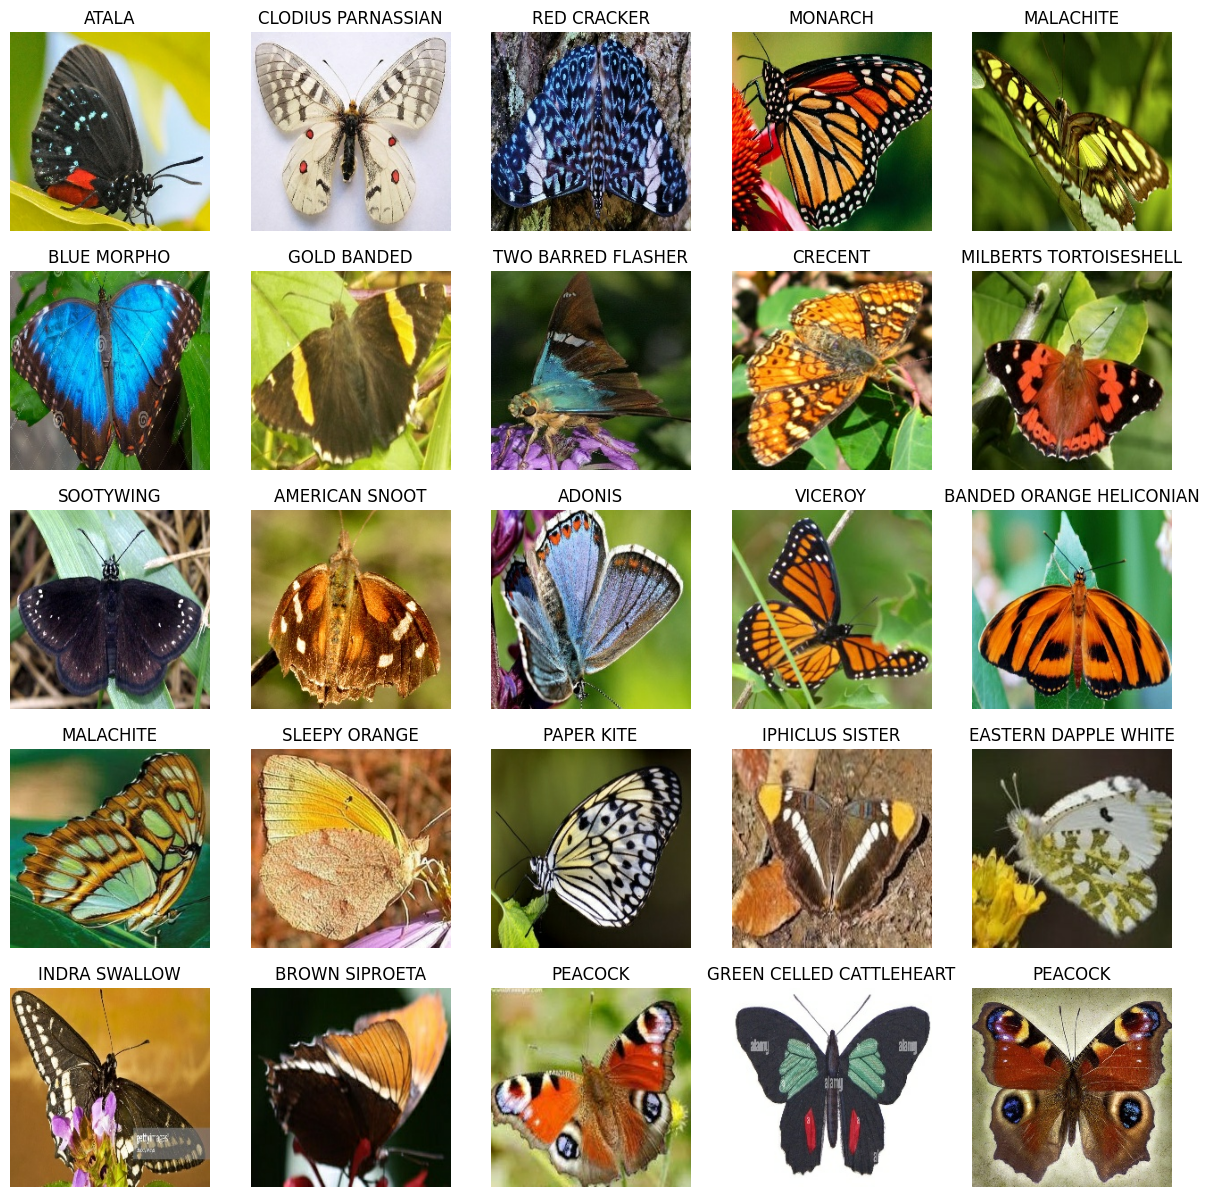

In [15]:
import matplotlib.pyplot as plt
import numpy as np

class_names = training_data.class_names
NUM_IMAGES = 25

plt.figure(figsize=(15, 15))

for images, labels in training_data.take(1):
    for j in range(NUM_IMAGES):
        axis = plt.subplot(5, 5, j + 1)
        plt.imshow(np.asarray(images[j]).astype("uint8"))
        plt.title(class_names[labels[j]])
        plt.axis("off")


Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,022,651 (3.90 MB)

 Trainable params: 83,531 (326.29 KB)

 Non-trainable params: 939,120 (3.58 MB)

Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 122s 397ms/step - accuracy: 0.2631 - loss: 3.2385 - val_accuracy: 0.8160 - val_loss: 0.8501
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 138s 384ms/step - accuracy: 0.7218 - loss: 1.0199 - val_accuracy: 0.8747 - val_loss: 0.4894
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 112s 384ms/step - accuracy: 0.8073 - loss: 0.6909 - val_accuracy: 0.9093 - val_loss: 0.3552
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 142s 385ms/step - accuracy: 0.8435 - loss: 0.5450 - val_accuracy: 0.9173 - val_loss: 0.3138
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 142s 384ms/step - accuracy: 0.8578 - loss: 0.4798 - val_accuracy: 0.9307 - val_loss: 0.2759
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.9183 - loss: 0.3085

🎯 Test Accuracy: 0.9093
🧮 Test Loss: 0.3179
Found 375 files.
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 457ms/step
📌 Predicted labels: [22  0  0  0  0  1  1  1  1  1]


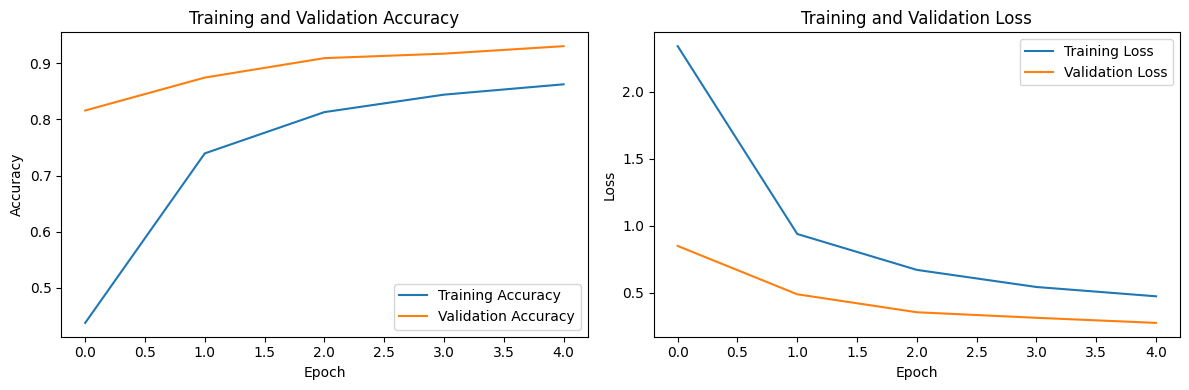

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5
DATA_DIR = "/content/butterfly-data/butterfly-classification"
NUM_CLASSES = 75  # Số lớp từ bộ dữ liệu (đã xác định trước)

# Tiền xử lý dữ liệu
def preprocess(ds):
    return ds.map(lambda x, y: (preprocess_input(x), y))

# Tải dữ liệu
train_data = image_dataset_from_directory(
    DATA_DIR + "/train",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_data = image_dataset_from_directory(
    DATA_DIR + "/val",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data = image_dataset_from_directory(
    DATA_DIR + "/test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Áp dụng tiền xử lý cho dữ liệu
train_data = preprocess(train_data)
valid_data = preprocess(valid_data)
test_data = preprocess(test_data)

# Tạo mô hình MobileNetV3Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model.trainable = False  # Đóng băng các tầng của mô hình cơ sở

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS,
    verbose=1
)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\n🎯 Test Accuracy: {test_accuracy:.4f}")
print(f"🧮 Test Loss: {test_loss:.4f}")

# Dự đoán trên tập kiểm tra
predict_ds = image_dataset_from_directory(
    DATA_DIR + "/test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode=None
)
predict_ds = predict_ds.map(lambda x: preprocess_input(x))
predictions = model.predict(predict_ds)
predicted_labels = np.argmax(predictions, axis=1)

# In 10 nhãn dự đoán đầu tiên
print("📌 Predicted labels:", predicted_labels[:10])

# Vẽ biểu đồ lịch sử huấn luyện
plt.figure(figsize=(12, 4))

# Đồ thị độ chính xác
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Đồ thị mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling_2[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_36       │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 113, 113,  │          0 │ activation_36[0]… │
│ (ZeroPadding2D)     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_28 (ReLU)     │ (None, 56, 56,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu_28[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_29 (ReLU)     │ (None, 1, 1, 16)  │          0 │ add_18[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_18         │ (None, 1, 1, 16)  │          0 │ re_lu_29[0][0]    │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 56, 56,    │          0 │ re_lu_28[0][0],   │
│ (Multiply)          │ 16)               │            │ multiply_18[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,022,651 (3.90 MB)

 Trainable params: 83,531 (326.29 KB)

 Non-trainable params: 939,120 (3.58 MB)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_437']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


291/291 ━━━━━━━━━━━━━━━━━━━━ 123s 400ms/step - accuracy: 0.2580 - loss: 3.2332 - val_accuracy: 0.8320 - val_loss: 0.8349
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 113s 388ms/step - accuracy: 0.7254 - loss: 1.0004 - val_accuracy: 0.8773 - val_loss: 0.4887
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 144s 395ms/step - accuracy: 0.8019 - loss: 0.6758 - val_accuracy: 0.9147 - val_loss: 0.3699
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 142s 396ms/step - accuracy: 0.8451 - loss: 0.5393 - val_accuracy: 0.9147 - val_loss: 0.3158
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 113s 388ms/step - accuracy: 0.8635 - loss: 0.4578 - val_accuracy: 0.9280 - val_loss: 0.2739
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.9213 - loss: 0.2854

🎯 Test Accuracy: 0.9093
🧮 Test Loss: 0.3157
Found 375 files.


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_437']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 551ms/step
📌 Predicted labels: [0 0 0 0 0 1 1 1 1 1]


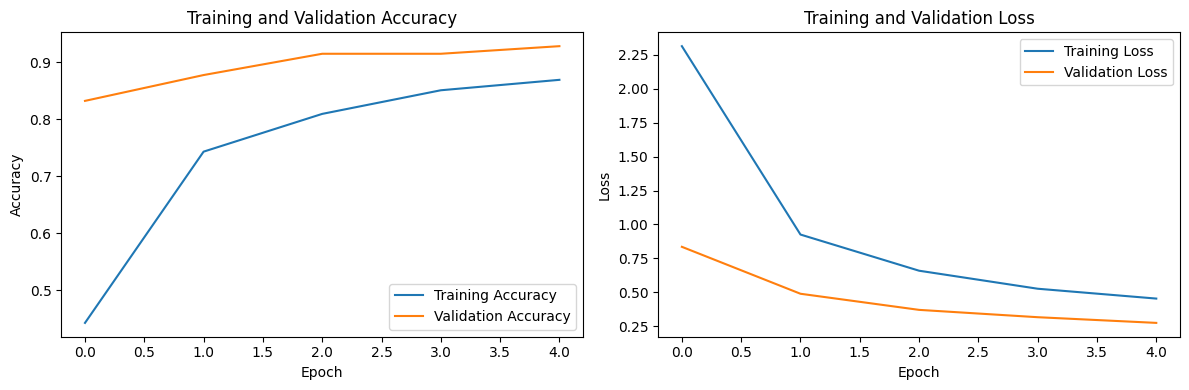

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5
DATA_DIR = "/content/butterfly-data/butterfly-classification"
NUM_CLASSES = 75  # Số lớp từ bộ dữ liệu (đã xác định trước)

# Tiền xử lý dữ liệu
def preprocess(ds):
    return ds.map(lambda x, y: (preprocess_input(x), y))

# Tải dữ liệu
train_data = image_dataset_from_directory(
    DATA_DIR + "/train",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_data = image_dataset_from_directory(
    DATA_DIR + "/val",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data = image_dataset_from_directory(
    DATA_DIR + "/test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Áp dụng tiền xử lý cho dữ liệu
train_data = preprocess(train_data)
valid_data = preprocess(valid_data)
test_data = preprocess(test_data)

# Tạo mô hình MobileNetV3Small
# Explicitly define the input layer
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Pass the input tensor to the base model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False  # Đóng băng các tầng của mô hình cơ sở

# Build the rest of the model on top of the base model's output
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Create the full model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS,
    verbose=1
)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\n🎯 Test Accuracy: {test_accuracy:.4f}")
print(f"🧮 Test Loss: {test_loss:.4f}")

# Dự đoán trên tập kiểm tra
predict_ds = image_dataset_from_directory(
    DATA_DIR + "/test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode=None
)
predict_ds = predict_ds.map(lambda x: preprocess_input(x))
predictions = model.predict(predict_ds)
predicted_labels = np.argmax(predictions, axis=1)

# In 10 nhãn dự đoán đầu tiên
print("📌 Predicted labels:", predicted_labels[:10])

# Vẽ biểu đồ lịch sử huấn luyện
plt.figure(figsize=(12, 4))

# Đồ thị độ chính xác
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Đồ thị mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model again with the potentially more robust structure
model.save('butterfly_classifier.h5')

# Now, try loading the model again in the next cell.
# import tensorflow as tf
# from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt

# IMAGE_SIZE = 224
# class_names = ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO',
#                'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE',
#                'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA',
#                'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT',
#                'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL',
#                'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY',
#                'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT',
#                'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART',
#                'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE',
#                'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL',
#                'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW',
#                'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW',
#                'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRAL']

# model = tf.keras.models.load_model('butterfly_classifier.h5')

# def predict_butterfly(image_path):
#     img = Image.open(image_path).convert('RGB')
#     img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
#     img_array = np.array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = preprocess_input(img_array)

#     predictions = model.predict(img_array)
#     predicted_class_idx = np.argmax(predictions, axis=1)[0]
#     predicted_class = class_names[predicted_class_idx]
#     confidence = predictions[0][predicted_class_idx]

#     print(f"Predicted Butterfly: {predicted_class} (Confidence: {confidence:.4f})")

#     plt.imshow(img)
#     plt.title(f"Prediction: {predicted_class} ({confidence:.4f})")
#     plt.axis('off')
#     plt.show()

# # Ví dụ sử dụng
# image_path = 'path/to/your/butterfly_image.jpg'
# predict_butterfly(image_path)

In [62]:
# Lưu mô hình
# Thêm đuôi .keras hoặc .h5 vào filepath
model.save('/content/butterfly_classifier.keras') # Hoặc '/content/butterfly_classifier.h5'

In [50]:
import tensorflow as tf

# Load the model with the correct file extension
model = tf.keras.models.load_model('/content/butterfly_classifier.keras')

# You can now use the loaded model
print("Model loaded successfully!")
# For example, you might want to compile it again if you plan to continue training
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 


TensorFlow Version: 2.18.0
Model loaded successfully!


Saving anh1.jpg to anh1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Butterfly: ADONIS (Confidence: 0.7944)


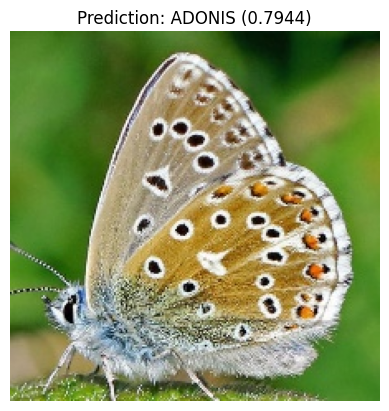

In [64]:
# Cài đặt TensorFlow 2.15.0
!pip install tensorflow==2.15.0

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Kiểm tra phiên bản TensorFlow
print("TensorFlow Version:", tf.__version__)

# Danh sách lớp
class_names = ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO',
               'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE',
               'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA',
               'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT',
               'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL',
               'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY',
               'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT',
               'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART',
               'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE',
               'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL',
               'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW',
               'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW',
               'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRAL',
               'RED CRACKER', 'RED POSTMAN', 'RED SPOTTED PURPLE', 'SCARCE SWALLOW',
               'SILVER SPOT SKIPPER', 'SLEEPY ORANGE', 'SOOTYWING', 'SOUTHERN DOGFACE',
               'STRAITED QUEEN', 'TROPICAL LEAFWING', 'TWO BARRED FLASHER', 'ULYSES',
               'VICEROY', 'WOOD SATYR', 'YELLOW SWALLOW TAIL', 'ZEBRA LONG WING']

# Kiểm tra file mô hình
if not os.path.exists('/content/butterfly_classifier.keras'):
    print("Error: Model file 'butterfly_classifier.keras' not found. Please train and save the model first.")
else:
    # Tải mô hình
    try:
        model = tf.keras.models.load_model('/content/butterfly_classifier.keras')
        print("Model loaded successfully!")
    except Exception as e:
        print("Error loading model:", str(e))
        raise

def predict_butterfly(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_names[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]

    print(f"Predicted Butterfly: {predicted_class} (Confidence: {confidence:.4f})")
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.4f})")
    plt.axis('off')
    plt.show()

# Tải ảnh
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predict_butterfly(image_path)